# Multiclass Classification and Neural Networks.
usefull links : [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html] 


In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:

print("[X] downloading data...")
mnist = datasets.fetch_mldata("MNIST Original")

[X] downloading data...


In [3]:
print('mnist data shape : ', mnist.data.shape)
print('mnist target shape : ', mnist.target.shape)
print('target', mnist.target)
w,d = np.unique(mnist.target, return_inverse=True)
print('d', d)
np.bincount(d)


mnist data shape :  (70000, 784)
mnist target shape :  (70000,)
target [ 0.  0.  0. ...,  9.  9.  9.]
d [0 0 0 ..., 9 9 9]


array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958], dtype=int64)

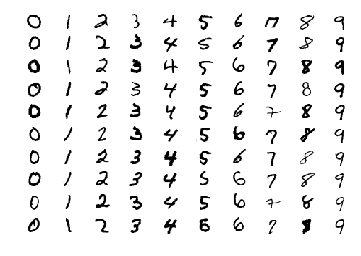

In [4]:
n_digits = 10
n_display_digits = 10
for col in range(n_digits):
    for row in range(n_display_digits):
        plt.subplot(n_display_digits,n_digits,(col)+ n_digits*row+1)
        img = mnist.data[3000+col*6000+row].reshape(28,28)
        plt.axis('off')
        plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

## Let's try to do this multiclass classification manually


In [5]:
from sklearn.cross_validation import train_test_split

#Temporarily reduce the training set to speed up execution while testing...
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.99)
print('X_train size :', X_train.shape)

print(y_train)

X_train size : (700, 784)
[ 9.  3.  1.  0.  9.  7.  1.  8.  9.  6.  8.  7.  5.  0.  8.  6.  3.  4.
  8.  3.  1.  5.  3.  8.  0.  8.  2.  6.  0.  7.  1.  8.  1.  4.  9.  9.
  4.  5.  9.  6.  6.  3.  8.  8.  9.  9.  1.  3.  5.  9.  2.  9.  1.  2.
  1.  3.  0.  4.  2.  6.  5.  5.  1.  8.  2.  6.  5.  1.  2.  1.  6.  8.
  9.  4.  7.  8.  0.  8.  3.  5.  8.  1.  1.  0.  6.  2.  1.  7.  5.  2.
  9.  1.  3.  2.  2.  6.  2.  5.  0.  9.  0.  2.  7.  1.  1.  8.  9.  7.
  5.  1.  2.  3.  0.  5.  2.  4.  9.  5.  8.  6.  6.  0.  5.  6.  5.  4.
  6.  4.  0.  4.  5.  2.  8.  7.  6.  9.  9.  6.  2.  4.  4.  1.  2.  9.
  8.  3.  0.  3.  2.  2.  9.  8.  7.  9.  8.  5.  6.  5.  2.  0.  7.  0.
  2.  5.  5.  0.  6.  1.  7.  7.  4.  5.  6.  6.  8.  9.  3.  7.  8.  3.
  1.  0.  8.  5.  8.  5.  4.  5.  8.  6.  4.  3.  5.  7.  8.  5.  0.  2.
  8.  5.  0.  3.  9.  0.  4.  4.  8.  4.  1.  7.  7.  6.  1.  9.  6.  1.
  0.  3.  5.  4.  9.  8.  7.  7.  5.  6.  6.  0.  6.  7.  0.  2.  7.  3.
  5.  6.  1.  5.  1.  0. 

The code of these functions should be in a py file to avoid duplication...

In [6]:
from scipy.special import expit

# Split Cost and Gradient : easier to use on personnal descent algo, and required for optimize.fmin function
# finally split Cost and Gradient : easier to use on personnal descent algo, and required for optimize.fmin function
def computeCostBFGS(theta, X, y):
    # y MUST be a column vector.
    y.shape = (y.size,1)

    # Number of samples (training examples)
    m = y.shape[0]
    
    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    #print('H:', H)
    
    #print('H:', H)
    J = np.sum(-y*(np.log(H)) - (1-y)*np.log(1-H)) / m
    
    theta.shape = (1,theta.size)
    theta = np.ndarray.flatten(theta[0])
    
    #print('J:', J)

    return J


def computeGradientBFGS(theta, X, y):
    # y MUST be a column vector.
    y.shape = (y.size,1)

    # Number of samples (training examples)
    m = y.shape[0]

    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    grad = np.dot( ((H-y) / m).transpose(), X) / m
    grad.shape = (grad.size, 1)
    theta.shape = (theta.size)
    theta = np.ndarray.flatten(theta)
    grad = np.ndarray.flatten(grad)
    
    return grad


X shape (700, 785)
y :  [ 9.  3.  1.  0.  9.  7.  1.  8.  9.  6.  8.  7.  5.  0.  8.  6.  3.  4.
  8.  3.  1.  5.  3.  8.  0.  8.  2.  6.  0.  7.  1.  8.  1.  4.  9.  9.
  4.  5.  9.  6.  6.  3.  8.  8.  9.  9.  1.  3.  5.  9.  2.  9.  1.  2.
  1.  3.  0.  4.  2.  6.  5.  5.  1.  8.  2.  6.  5.  1.  2.  1.  6.  8.
  9.  4.  7.  8.  0.  8.  3.  5.  8.  1.  1.  0.  6.  2.  1.  7.  5.  2.
  9.  1.  3.  2.  2.  6.  2.  5.  0.  9.  0.  2.  7.  1.  1.  8.  9.  7.
  5.  1.  2.  3.  0.  5.  2.  4.  9.  5.  8.  6.  6.  0.  5.  6.  5.  4.
  6.  4.  0.  4.  5.  2.  8.  7.  6.  9.  9.  6.  2.  4.  4.  1.  2.  9.
  8.  3.  0.  3.  2.  2.  9.  8.  7.  9.  8.  5.  6.  5.  2.  0.  7.  0.
  2.  5.  5.  0.  6.  1.  7.  7.  4.  5.  6.  6.  8.  9.  3.  7.  8.  3.
  1.  0.  8.  5.  8.  5.  4.  5.  8.  6.  4.  3.  5.  7.  8.  5.  0.  2.
  8.  5.  0.  3.  9.  0.  4.  4.  8.  4.  1.  7.  7.  6.  1.  9.  6.  1.
  0.  3.  5.  4.  9.  8.  7.  7.  5.  6.  6.  0.  6.  7.  0.  2.  7.  3.
  5.  6.  1.  5.  1.  0.  0

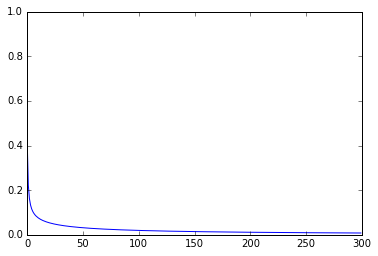

Learning One vs ALL for : 1
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0102932328876


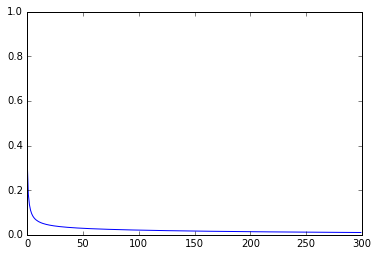

Learning One vs ALL for : 2
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0375359627258


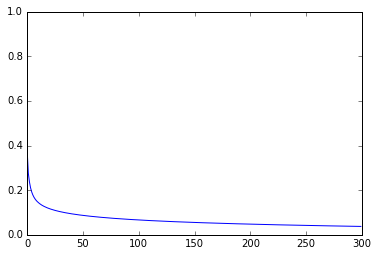

Learning One vs ALL for : 3
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0495667672626


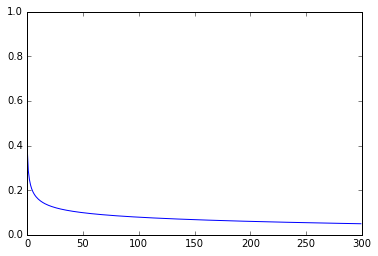

Learning One vs ALL for : 4
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0257111183879


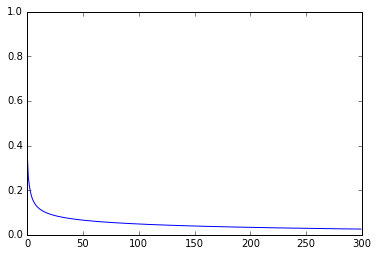

Learning One vs ALL for : 5
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0341039507965


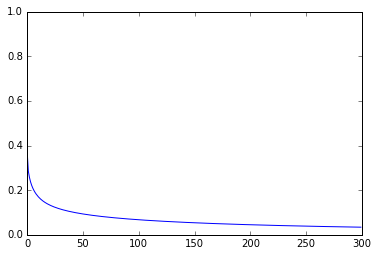

Learning One vs ALL for : 6
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0142134498082


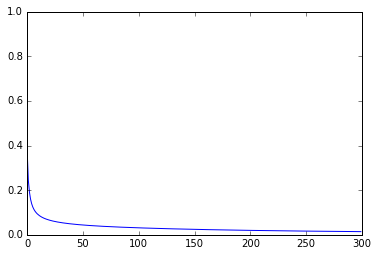

Learning One vs ALL for : 7
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0221288936778


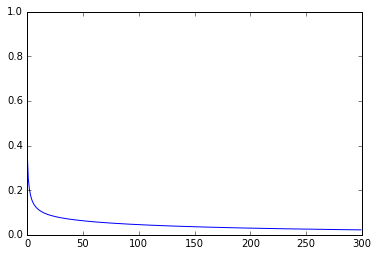

Learning One vs ALL for : 8
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0739748420135


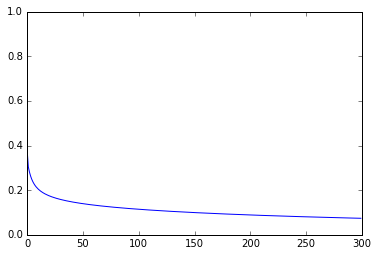

Learning One vs ALL for : 9
==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0464593222998


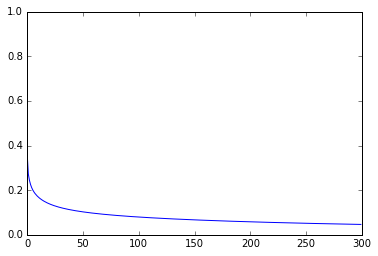

All_Theta:  [ -1.24679764e-05   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
All costs:  [ 0.00805615  0.01029323  0.03753596  0.04956677  0.02571112  0.03410395
  0.01421345  0.02212889  0.07397484  0.04645932]
Cost Mean:  0.0322043694112


In [14]:
# m : number of training samples
# n : number of features
m, n = X_train.shape

# add this dummy parameter to X
ones = np.ones((m, 1))
X = np.hstack((ones, X_train))
print('X shape', X.shape)

all_theta = np.array([])

print('y : ', y_train.transpose())

# One vs all algorithm
cost_for_all_values = np.array([])

for value in range(10):
    print('Learning One vs ALL for :', value)
    y = np.copy(y_train)
    y[y_train!=value] = 0
    y[y_train==value] = 1
    # prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
    # we have n+1 parameters because of the "dummy parameter"
    theta = np.zeros(n+1)

    #print('y : ', y)
    #print('Theta: ', theta)
    #cost, grad = computeCostOptim(theta, X, y)
    cost = computeCostBFGS(theta, X, y)
    grad = computeGradientBFGS(theta, X, y)
    print('==== Initial Cost :', cost)
    #print('==== Initial Gradient :', grad)
    print('= grad shape : ', grad.shape)
    alpha = 0.001
    cost_evolution = []
    # Number of samples (training examples)
    m = y.shape[0]

    for i in range(3000):
        theta = theta - alpha*grad
        #print('theta :', theta)
        if i%10 == 0:
            #cost, grad = gradientDescent(theta, X, y, m, True)
            cost = computeCostBFGS(theta, X, y)
            grad = computeGradientBFGS(theta, X, y)
            cost_evolution.append(cost)
        else:
            #cost, grad = gradientDescent(theta, X, y, m, False)
            grad = computeGradientBFGS(theta, X, y)

    cost_for_all_values = np.append(cost_for_all_values, cost)
    all_theta = np.hstack((all_theta, theta))
    #print('Theta: ', theta)
    print('Cost :', cost)
    #print('Cost evolution', cost_evolution)
    plt.plot(range(len(cost_evolution)), cost_evolution)
    plt.xlim((0,len(cost_evolution)))
    plt.ylim((0, 1))
    plt.show()

print('All_Theta: ', all_theta.transpose())
print('All costs: ', cost_for_all_values)
print('Cost Mean: ', cost_for_all_values.mean())


## It doesn't seem to work without lambda and alpha

In [15]:
m, n = X_train.shape

print('y train', y_train)

all_theta = np.array([])

# One vs all algorithm
for value in range(10):
    y = np.copy(y_train)
    y[y_train!=value] = 0
    y[y_train==value] = 1

    # prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
    # we have n+1 parameters because of the "dummy parameter"
    theta = np.zeros(n+1)

    # add this dummy parameter to X
    ones = np.ones((m, 1))
    X = np.hstack((ones, X_train))

    from scipy import optimize

    # prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
    # we have n+1 parameters because of the "dummy parameter"
    init_theta = np.zeros((n+1))
    theta = optimize.fmin_ncg(computeCostBFGS, x0=init_theta, args=(X,y), fprime=computeGradientBFGS)
    #print('SOLUTION : ', theta)
    all_theta = np.hstack((all_theta, theta))
    
print('SOLUTION : ', all_theta)


y train [ 9.  3.  1.  0.  9.  7.  1.  8.  9.  6.  8.  7.  5.  0.  8.  6.  3.  4.
  8.  3.  1.  5.  3.  8.  0.  8.  2.  6.  0.  7.  1.  8.  1.  4.  9.  9.
  4.  5.  9.  6.  6.  3.  8.  8.  9.  9.  1.  3.  5.  9.  2.  9.  1.  2.
  1.  3.  0.  4.  2.  6.  5.  5.  1.  8.  2.  6.  5.  1.  2.  1.  6.  8.
  9.  4.  7.  8.  0.  8.  3.  5.  8.  1.  1.  0.  6.  2.  1.  7.  5.  2.
  9.  1.  3.  2.  2.  6.  2.  5.  0.  9.  0.  2.  7.  1.  1.  8.  9.  7.
  5.  1.  2.  3.  0.  5.  2.  4.  9.  5.  8.  6.  6.  0.  5.  6.  5.  4.
  6.  4.  0.  4.  5.  2.  8.  7.  6.  9.  9.  6.  2.  4.  4.  1.  2.  9.
  8.  3.  0.  3.  2.  2.  9.  8.  7.  9.  8.  5.  6.  5.  2.  0.  7.  0.
  2.  5.  5.  0.  6.  1.  7.  7.  4.  5.  6.  6.  8.  9.  3.  7.  8.  3.
  1.  0.  8.  5.  8.  5.  4.  5.  8.  6.  4.  3.  5.  7.  8.  5.  0.  2.
  8.  5.  0.  3.  9.  0.  4.  4.  8.  4.  1.  7.  7.  6.  1.  9.  6.  1.
  0.  3.  5.  4.  9.  8.  7.  7.  5.  6.  6.  0.  6.  7.  0.  2.  7.  3.
  5.  6.  1.  5.  1.  0.  0.  3.  3.  9.  6

C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply


Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 263
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.073089
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 32
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.204993
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 14
         Hessian evaluations: 0


C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide 

Optimization terminated successfully.
         Current function value: nan
         Iterations: 17
         Function evaluations: 92
         Gradient evaluations: 284
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 254
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 274
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.042669
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 34
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.324732
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 8
         Hessian ev

In [26]:
from sklearn.linear_model import LogisticRegression

Lambda = 1

lr = LogisticRegression(solver='lbfgs', C=1/Lambda)  # C = 1/lambda (default = 1, if lower, regularization is stronger)

test_scores_for_all = np.array([])
train_scores_for_all = np.array([])

# One vs all algorithm
for value in range(10):
    y = np.copy(y_train)
    y[y_train==value] = 1
    y[y_train!=value] = 0

    lr.fit(X_train,y)
    lr.get_params()

    #print('Coeff = {}, intercept = {}'.format(lr.coef_, lr.intercept_ ))

    train_score = lr.score(X_train, y)
    train_scores_for_all = np.append(train_scores_for_all, train_score)
    print('Score on training set : ', lr.score(X_train,y))
    
    y_test_one = np.copy(y_test)
    y_test_one[y_test==value] = 1
    y_test_one[y_test!=value] = 0
 
    test_score = lr.score(X_test,y_test_one)
    test_scores_for_all = np.append(test_scores_for_all, test_score)
    
    print('Score on test set : ', test_score)

print('Mean performace on training set : ', np.mean(train_scores_for_all))
print('Mean performance on test set : ', np.mean(test_scores_for_all))
for value in range(10):
    print('Test score for {} : {}'.format(value, test_scores_for_all[value]))
    
    

Score on training set :  1.0
Score on test set :  0.981457431457
Score on training set :  1.0
Score on test set :  0.981443001443
Score on training set :  1.0
Score on test set :  0.943376623377
Score on training set :  1.0
Score on test set :  0.936926406926
Score on training set :  1.0
Score on test set :  0.966017316017
Score on training set :  1.0
Score on test set :  0.947561327561
Score on training set :  1.0
Score on test set :  0.97240981241
Score on training set :  1.0
Score on test set :  0.966955266955
Score on training set :  1.0
Score on test set :  0.909826839827
Score on training set :  1.0
Score on test set :  0.931414141414
Mean performace on training set :  1.0
Mean performance on test set :  0.953738816739
Test score for 0 : 0.9814574314574315
Test score for 1 : 0.9814430014430015
Test score for 2 : 0.9433766233766234
Test score for 3 : 0.9369264069264069
Test score for 4 : 0.966017316017316
Test score for 5 : 0.9475613275613276
Test score for 6 : 0.9724098124098124
